In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [2]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [4]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [5]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


### Data visualization on Minist Dataset

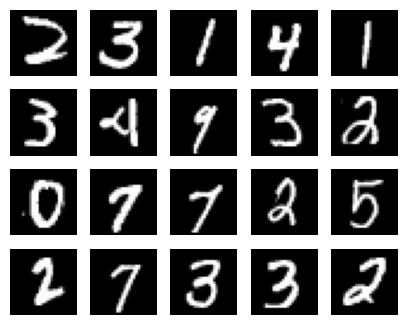

In [6]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))
input_shape = (28,28)

X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print("The shape of of X_tain after reshape: ", X_train.shape)
print("The shape of of y_test after reshape: ", X_test.shape)

# convert to one-hot vector
y_train_vector = to_categorical(y_train, num_labels)
y_test_vector = to_categorical(y_test, num_labels)
print("The shape of of X_tain after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

The shape of of X_tain after reshape:  (60000, 28, 28)
The shape of of y_test after reshape:  (10000, 28, 28)
The shape of of X_tain after convert to one-hot vector:  (60000, 10)
The shape of of y_test after convert to one-hot vector:  (10000, 10)


## Building and Training the Classification RNN

### Importing the Keras libraries and packages

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Creating the RNN

In [9]:
def create_rnn_model():
    model = Sequential([
        LSTM(units=128, return_sequences = True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units = 64, return_sequences = True),
        Dropout(0.2),
        LSTM(units = 64),
        Dropout(0.2),
        Dense(10, activation="softmax")
    ])
    return model

## Build and Compare Adam optimizer with other optimizers

In [10]:
def train_rnn_model(optimizer, x_train, y_train, x_val, y_val):
    print("Opimizer: ", optimizer)
    model = create_rnn_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    return model, history

In [11]:
adam_rnn_model, adam_rnn_history = train_rnn_model(Adam(),X_train, y_train_vector,
                                                  X_test, y_test_vector)
rmsprop_rnn_model, rmsprop_rnn_history = train_rnn_model(RMSprop(), X_train, y_train_vector,
                                                         X_test, y_test_vector)
adagrad_rnn_model, adagrad_rnn_history = train_rnn_model(Adagrad(learning_rate=0.01), X_train, y_train_vector,
                                                         X_test, y_test_vector)
sgd_rnn_model, sgd_rnn_history = train_rnn_model(SGD(learning_rate=0.01, nesterov=True), X_train, y_train_vector, 
                                                 X_test, y_test_vector)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x105695ca0>
Epoch 1/10


/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 - 30s - 63ms/step - accuracy: 0.8658 - loss: 0.4352 - val_accuracy: 0.9512 - val_loss: 0.1529
Epoch 2/10
469/469 - 29s - 63ms/step - accuracy: 0.9568 - loss: 0.1468 - val_accuracy: 0.9667 - val_loss: 0.1118
Epoch 3/10
469/469 - 29s - 62ms/step - accuracy: 0.9693 - loss: 0.1038 - val_accuracy: 0.9759 - val_loss: 0.0792
Epoch 4/10
469/469 - 29s - 63ms/step - accuracy: 0.9762 - loss: 0.0801 - val_accuracy: 0.9800 - val_loss: 0.0641
Epoch 5/10
469/469 - 30s - 63ms/step - accuracy: 0.9798 - loss: 0.0681 - val_accuracy: 0.9824 - val_loss: 0.0590
Epoch 6/10
469/469 - 30s - 63ms/step - accuracy: 0.9822 - loss: 0.0600 - val_accuracy: 0.9813 - val_loss: 0.0582
Epoch 7/10
469/469 - 30s - 63ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9834 - val_loss: 0.0554
Epoch 8/10
469/469 - 31s - 66ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9841 - val_loss: 0.0511
Epoch 9/10
469/469 - 31s - 66ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9870 - val_loss: 0

In [12]:
loss_adam, acc_adm = adam_rnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of adam: %.1f%%" % (100.0 * acc_adm))
loss_rmsprop, acc_rmsprop = rmsprop_rnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of RMSprop: %.1f%%" % (100.0 * acc_rmsprop))
loss_adagrad, acc_adagrad = adagrad_rnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of adaGrad: %.1f%%" % (100.0 * acc_adagrad))
loss_sgd, acc_sgd = sgd_rnn_model.evaluate(X_test, y_test_vector, batch_size=128, verbose=2)
print("\nTest accuracy of SGD: %.1f%%" % (100.0 * acc_sgd))

79/79 - 1s - 18ms/step - accuracy: 0.9859 - loss: 0.0516

Test accuracy of adam: 98.6%
79/79 - 1s - 18ms/step - accuracy: 0.9841 - loss: 0.0611

Test accuracy of RMSprop: 98.4%
79/79 - 1s - 18ms/step - accuracy: 0.9673 - loss: 0.1085

Test accuracy of adaGrad: 96.7%
79/79 - 1s - 18ms/step - accuracy: 0.9517 - loss: 0.1571

Test accuracy of SGD: 95.2%


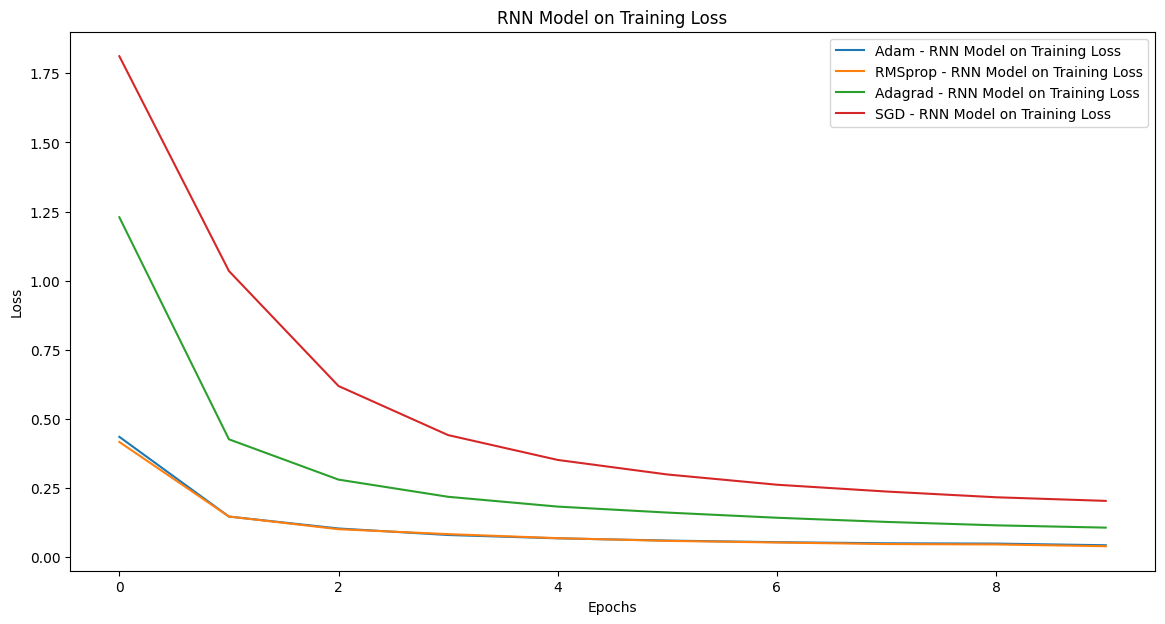

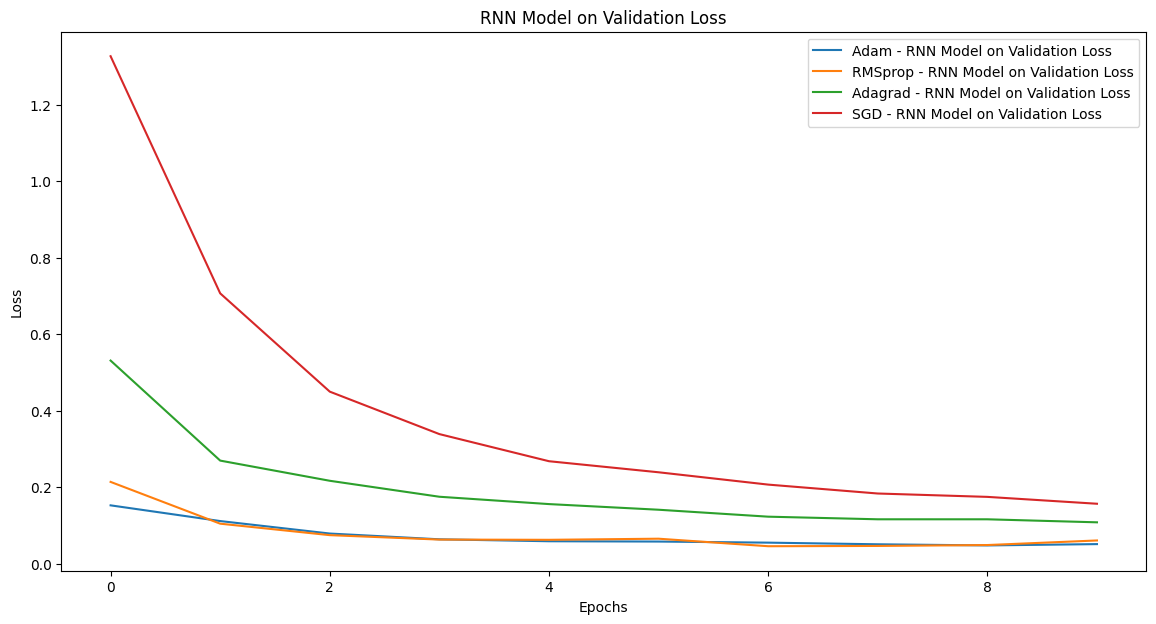

In [13]:
# Function to plot training and validation loss
def plot_loss(histories, optimizer_names, loss='loss'):

    if loss == 'val_loss':
        title = 'RNN Model on Validation Loss'
    else:
        title = 'RNN Model on Training Loss'

    plt.figure(figsize=(14, 7))

    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history[loss], label=f'{name} - {title}')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_rnn_history, rmsprop_rnn_history, adagrad_rnn_history, sgd_rnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'], 'loss')
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'], 'val_loss')

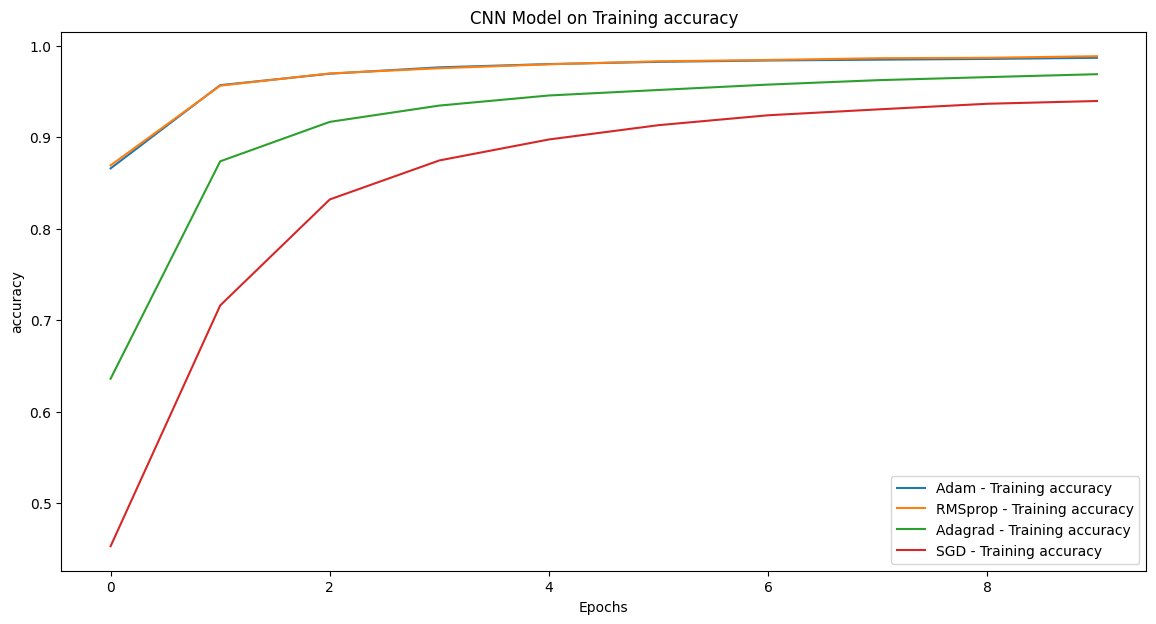

In [15]:
# Function to plot training accuracy
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('CNN Model on Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])